***

# Create and assess an extreme precipitation event index using NCAR's CONUS 404 Convective Permitting (CP) Global Circulation Model (GCM) grids with 4-km horizontal resolution compared to the PRISM monthly climatology precipitation dataset, and rain gauge data


## - Created September 2022 by Serke, D. for the NCAR GIS Group

***

## Purpose

- ### In this notebook, we will explore how to create a single sample index that are derived from more complex model fields.

- ### For this workflow, we have chosen to demonstrate a 'precipitation extreme' index, using monthly temporal resolution.

- ### The index values will then be compared to 'truth' data in the form of rain gauge time series values and long term climate normal values from [PRISM](https://prism.oregonstate.edu/).

- ### A user may choose to implement any manner of index or indicator, following the template in this workflow

- ### A list of other potential indices/indicators appears in these links: [WMO Climpact indices](https://climpact-sci.org/indices/), [IDMP drought indices](https://www.droughtmanagement.info/indices/)

- ### Another purpose is to gain a better understanding of the background, output fields, precision, and utility of NCAR's CONUS404 model as it is described in [this](https://link.springer.com/article/10.1007/s00382-016-3327-9) paper

***

## Background

- ### A review of Convective-permitting climate modelling was the topic of this [Prein et al. 2015](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014RG000475) paper

- ### Previous research by [Prein et al. 2022]() and [Prein et al. 2020](https://link.springer.com/content/pdf/10.1007/s00382-017-3993-2.pdf) has demonstrated that with high resolution, convection-permitting GCMs it is possible to identify longer duration precipitation events (eg monsoon, MCSs) via the frequency of days with synoptic-scale moisture advection into the region.  Using this field greatly improves predictability over directly utilizing modeled precipitation. We will explore that possibility here.

- ### Characteristics of NCAR's CONUS404 model, as discussed in Liu et al. 2017 include: 
### - runs on high performance computing system sponsored by the USGS 
### - uses Weather Research and Forecasting (WRF) model Version 3.9.1 with 4 x 4 km horizontal resolution over CONtinental US (CONUS) + portion of Canada 
### - hourly temporal output frequency 
### - resolves orography 
### - 40-year retrospective simulation (Oct of 1979-2021) 
### - permits convection 
### - initial boundary conditions from ERA5 1-hr reanalysis data 
### - 51 stretched vertical levels, with 50 mb as top level 
### - uses Thompson and Eidhammer (2014) aerosol-aware microphysics package 
### - uses Rapid Radiative Transfer Model 
### - uses Yonsei University planetary boundary layer 
### - uses the Noah-MP land-surface model, with several key custom modifications 
### - uses the Miguel Macho Fan (MFF) groundwater scheme 
### - spectral nudging is applied (to remove warm season bias) 
### - an upgraded lake water temperature treatment is implemented

####

- ### Potential advantages of high resolution CP models run multiple decades include:
### - resolving high intensity precipitation events, which are not possible in convection-parameterizing models
### - better resolve evapotranspiration (ET), the most uncertain water cycle term
### - the sum of these two is better resolved runoff
### - extremes are typically associated with mesoscale processes, such as mesoscale terrain forcing, gust fronts, dry lines, and MCSs, which are typically not properly depicted in GCMs


####

- ### Findings from the CONUS404 compared to 'truth':
### - Quite consistent year to year, having no visible deterioration and drifting with integration time
### - the model absolute error is well within the observational uncertainty
### - apparent deficiency is the mid-summer rainfall low bias over the central U.S., possibly indicative of too-weak (or too infrequent) propagating convection which originates from the Rockies
### - The pattern correlation coeffcient is higher than 0.96 for all seasons. 
### - WRF does particularly well in simulating the coastal and topographic modifcations over the western CONUS in all seasons
### - confrms the model’s capability in reproducing orographic precipitation
### - The average precipitation at all sites has a small negative bias of just −2 %
### - Able to replicate the observed annual cycle, accurately timing the maximum/minimum monthly precipitation, and the departure is typically a few percent of the observations

####

- ### For this exploratory workflow, we chose to demonstrate the Standardized Precipitation Index (SPI), developed by [McKee et al. (1993)](https://www.droughtmanagement.info/literature/AMS_Relationship_Drought_Frequency_Duration_Time_Scales_1993.pdf) 

***

## Workflow outline

- ### First, we will divide this complicated sounding process down into prioritized, manageable steps in this workflow outline...

### 1. Define a study period
### 2. Collect input data
    a. climatology - PRISM 4km x 4km horizontal resolution normals and time-series gridded datasets
    b. test        - CONUS 404 GCM, convection permitting, 4km x 4km horizontal resolution gridded dataset
    c. truth       - rain gauge/radar-derived Quantitative Precipitation Estimates (QPE) data
### 3. Set up user's python environment    
### 4. Ingest input data
### 5. Implement an extreme precipitation index
### 6. Visualize data
    a. fields from climatology  
    b. raw field from model
    c. index field from model and climatology 

***

## Step 1. Define a study period

- ### First, we need to identify a time period where all of our input datasets will be known to be available and an extreme precipitation event is known to have occurred

- ### The climatology data covers at least the last 30 years, with monthly 4km x 4km solution (similar to the CONUS404 model grid)

- ### Let's examine the [Colorado Front Range flooding from 2013](https://en.wikipedia.org/wiki/2013_Colorado_floods) to demonstrate the workflow

- ### A more detailed meteorological analysis of the event was presented by the National Weather Service (NWS) [at this link](https://www.weather.gov/media/bou/Sep_2013_Flood.pdf)

![CO_flood](https://crd.lbl.gov/assets/Uploads/Water-Vapor-Systems-Seen-From-GOES-15-and-GOES-13-Satellites-12-September-2013.gif)

## Next, we'll collect some data ...


***

## Step 2. Collect input datasets

- ### Next, we will collect the input datasets for the climatology/gauge dataset (2a, PRISM), and the GCM gridded dataset (2b, CONUS 404):

##

#### 2a climatology dataset -

#### - The PRISM 30-year precipitation (ppt) normals dataset can be downloaded [from this link](https://prism.oregonstate.edu/normals/)

#### - and the PRISM 30-year ppt time-series dataset can be downloaded [from this link](https://prism.oregonstate.edu/explorer/)

#### - For this workflow, the extracted contents of the .zip file were pointed to a subdirectory created under this path: /d1/serke/projects/CLIMATE_GIS/data/

###

2b GCM gridded dataset -

#### - The NCAR 440 model sample file can be accessed here: 

#### - Files will be publicly available within a few months via [NCAR's RDA](https://rda.ucar.edu/)

###

***

## Step 3. Set up user's python environment (for a linux machine)

- ### [Install conda or miniconda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/linux.html) on your machine, at least v3.x

 - ### Direct your browser to NCAR's [Jupyterhub](https://jupyterhub.hpc.ucar.edu/)

- ### Change directory (cd) into your python working directory:

- ### Activate your preferred python environment (example below):

- ### Install the following python packages, using the example command line below:

- ### Import installed packages into python environment

In [37]:
from   wrf                  import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim, cartopy_ylim, latlon_coords, geo_bounds)
from   netCDF4              import Dataset
import xarray               as     xr
import cartopy.crs          as     crs
from   cartopy.feature      import NaturalEarthFeature
import cartopy.feature      as     cfeature
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from __future__             import print_function

In [25]:
import rasterio                                   # to ingest raster format data, which are the .bil climatology file format 
from   rasterio.plot        import show           # show mapview
from   rasterio.plot        import show_hist      # show histogram
from   shapely.geometry     import box            #
# Display output of plots directly in Notebook
%matplotlib inline
import matplotlib.pyplot    as     plt            # for plotting
from   matplotlib.cm        import get_cmap
from   matplotlib.colors    import ListedColormap
import numpy                as     np             # for array functionality
import pandas               as     pd             # for dataframes
import geopandas            as     gpd            #
from   scipy.stats          import gamma          #
#import pyPRISMClimate                             # for PRISM dataset ingest
#from   pyPRISMClimate       import get_prism_monthlys, get_prism_monthly_single, get_prism_dailys, get_prism_daily_single,get_prism_normals
#from   pyPRISMClimate.utils import prism_iterator #
import statistics                                 # for stats functionality
import warnings                                   # 
warnings.filterwarnings("ignore")                 # silence warnings


***

## Step 4. Ingest input datasets

### 4a. PRISM Monthly Precipitation Climatology gridded dataset:

- ### Define the directory path that the ppt normals (.bil format) subdirectories and ppt point time-series files (.csv format) were stored in by the user in Step 2a:

In [ ]:
prism_dir                          = '/d1/serke/projects/CLIMATE_GIS/data/'
prism_normals_dir                  = 'PRISM_ppt_30yr_normal_4kmM3_09_bil/'
prism_timeseries_dir               = 'PRISM_ppt_30yr_timeseries_4kmM3_BLDR_csv/'

In [ ]:
prism_timeseries_name              = 'PRISM_ppt_stable_4km_199101_202012_40.0335_-105.2520.csv'

- ### Load the 30-year ppt time-series from near Boulder, CO from the .csv file (skipping the header lines) into a pandas dataframe:

In [ ]:
ppt_30yr_boulderCO_timeseries      = pd.read_csv(prism_dir + prism_timeseries_dir + prism_timeseries_name, header=10)
#ppt_30yr_boulderCO_timeseries

- ### Now subset the dataframe to include only ppt values from all 30 septembers

In [ ]:
# array of september month indices starts with the 8th and includes every 12th index until the last index (number 359)
ind_sept                           = np.arange(8, 359, 12)
# subset the original dataframe using iloc index method
ppt_30yr_sept_boulderCO_timeseries = ppt_30yr_boulderCO_timeseries.iloc[ind_sept]
ppt_30yr_sept_boulderCO_timeseries

- ### Now, lets work with the .bil ppt normals dataset.  Execute the 'prism_iterator' function that outputs information on the available .bil files in that path

In [ ]:
prism_iterator(prism_dir + prism_normals_dir, recursive = False)

### NOTE: The only variable is 'ppt', or daily precipitation amount in mm, since that was the only field requested from the PRISM data download interface

- ### Lets now load the 30-year normals file for September (month '09' in the .bil filename) using the 'full_path' field above:

In [ ]:
ppt_sept_normal = rasterio.open(prism_dir + prism_normals_dir + '/PRISM_ppt_30yr_normal_4kmM3_09_bil.bil')

- ### Display some raster properties (metadata, type, crs, shape, and layer count):

In [ ]:
ppt_sept_normal.meta

In [ ]:
type(ppt_sept_normal)

In [ ]:
ppt_sept_normal.crs

In [ ]:
ppt_sept_normal.read().shape

In [ ]:
ppt_sept_normal.count

### 4b. NCAR CONUS440 gridded dataset (borrowed from https://wrf-python.readthedocs.io/en/latest/basic_usage.html):

#### Access the CONUS404 data files in two possible ways:
####   1. via NCAR's casper supercomputer on glade, or
####   2. via manual access files on local storage
#### Both are demonstrated below ...

In [27]:
# 1. Access CONUS404 data files via NCAR's casper on glade
#    * This method was outlined here: https://ldcpy.readthedocs.io/en/v0.15.4/notebooks/LargeDataGladeNotebook.html
#    * requires the ldcpy module
#    * requires access to the NCAR machine and a project charge account

# --- Import Modules --- #
import os
import glob
import time
import sys
## Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
#sys.path.insert(0, '/glade/u/home/serke/newldcpy/ldcpy')
#import ldcpy
import numpy            as np
import xarray           as xr
import pandas           as pd
import geopandas        as gpd
import numcodecs
import dask
from   dask.distributed import Client, progress, LocalCluster 
#from   dask.distributed import performance_report
from   dask.diagnostics import ProgressBar
#import ncar_jobqueue
#from   ncar_jobqueue    import NCARCluster
from   dask_jobqueue    import PBSCluster
import holoviews        as     hv 
import hvplot
import glob
import zarr
# --- End Import Modules --- #

tic = time.time()
print('Process initiated at {0}'.format(time.ctime()))
## if you want to use the DASK daskboard, then modify the code below and run it
## dask.config.set(
##    {'distributed.dashboard.link': 'https://jupyterhub.hpc.ucar.edu/ch/user/abaker/proxy/{port}/status'}
## )

Process initiated at Wed Sep 28 22:19:54 2022


In [ ]:
# Connect to DASK distributed cluster:
#   * The cluster object is for a single compute node
cluster = PBSCluster(
    cores         = 2, 
    queue         = 'casper', 
    project       = 'NSAP0003', 
    memory        = '25GB', 
    walltime      = '02:00:00',  
    death_timeout = 75,
    resource_spec = 'select=1:ncpus=2:mem=25GB')

# scale as needed
n_jobs       = 4
n_jobs_start = n_jobs
#cluster.scale(jobs=n_jobs)
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster

# The scheduler creates a normal-looking job script that it can submit multiple times to the queue:
# Look at the job script (optional)
print(cluster.job_script())

# Connect client to the remote dask workers
client                       = Client(cluster)
client

In [8]:
# Define data file paths
CONUS404_casper_event_dir   = '/glade/work/serke/GIS/data/CONUS404/'
CONUS404_casper_event_yyyy  = 'WY2013/'
#CONUS404_casper_event_yyyy  = 'test/'
# define data file name
CONUS404_constant_data_name = 'constant/wrfconstants_d01_1979-10-01_00:00:00.nc4'
# list directory contents
CONUS404_alltestfiles       = sorted(glob.glob(r'/glade/work/serke/GIS/data/CONUS404/WY2013/*'))

In [10]:
# print info on available files
print('Number of files to process = ', len(CONUS404_alltestfiles))

# open first data file with xarray module
geogrid0                     = xr.open_dataset("".join(CONUS404_alltestfiles[0]))
# extract the ACumulatedRAIN (ACRAINLSM) field, will aggregate all other times' data to this variable
# also, squeeze out the singleton 3rd dimension so shape matches XLAT and XLONG
ACRAINLSM                    = geogrid0.ACRAINLSM.squeeze()
# Loop over each hourly file in CONUS404_alltestfiles list
for index, fname in enumerate(CONUS404_alltestfiles):
    #print(index)
    # Extract the 'ACRAINLSM' variable for hourly file number 'index'
    geogrid       = xr.open_dataset("".join(CONUS404_alltestfiles[index]))
    # sum previous (ACRAINLSM) and current (geogrid[index]) xarrays of accumulated precip
    ACRAINLSM     = ACRAINLSM + geogrid.ACRAINLSM.squeeze()

# load constant field nc file
CONUS404_constant_nc         = Dataset(CONUS404_casper_event_dir + CONUS404_constant_data_name)
# Get the lat/lon coordinates from constant file
XLAT                         = getvar(CONUS404_constant_nc, "XLAT")
XLONG                        = getvar(CONUS404_constant_nc, "XLONG")
XTIME                        = getvar(CONUS404_constant_nc, "XTIME")

# check that variable shapes are consistent
print('  ACRAINLSM  shape = ', ACRAINLSM.shape)
print('  XLAT shape       = ', XLAT.shape)
print('  XLONG shape      = ', XLONG.shape)

  Number of files =  216
ACRAINLSM  shape =  (1015, 1367)
XLAT shape       =  (1015, 1367)
XLONG shape      =  (1015, 1367)


In [ ]:
# Close the dask cluster and client
cluster.close()
client.close()

In [ ]:
# 2. Access CONUS404 data files via local storage
# define data file path      
CONUS404_data_path           = '/d1/serke/projects/CLIMATE_GIS/data/CONUS404/'
# define data file names
CONUS404_constant_data_name  = 'wrfconstants_d01_1979-10-01_00:00:00.nc4'
CONUS404_2d_data_name1       = 'wrf2d_d01_2013-09-12_06:00:00'
CONUS404_2d_data_name2       = 'wrf2d_d01_2013-09-12_12:00:00'
# load constant field nc file
CONUS404_constant_nc         = Dataset(CONUS404_data_path + CONUS404_constant_data_name)
# load 2d field nc file
CONUS404_2d_nc1              = Dataset(CONUS404_data_path + CONUS404_2d_data_name1)
CONUS404_2d_nc2              = Dataset(CONUS404_data_path + CONUS404_2d_data_name2)
# Get the lat/lon coordinates from constant file
XLAT                         = getvar(CONUS404_constant_nc, "XLAT")
XLONG                        = getvar(CONUS404_constant_nc, "XLONG")
XTIME                        = getvar(CONUS404_constant_nc, "XTIME")
# Get desired 2d model fields (fix to handle input from separate files from: https://groups.google.com/a/ucar.edu/g/wrfpython-talk/c/5-mwY1_EC94?pli=1)
#ACRAINLSM                   = getvar(CONUS404_2d_nc, "ACRAINLSM", meta=False)
geogrid1                     = xr.open_dataset(CONUS404_data_path + CONUS404_2d_data_name1)
geogrid2                     = xr.open_dataset(CONUS404_data_path + CONUS404_2d_data_name2)
# display field characteristics
#print('XLAT shape = ',      XLAT.shape)
#print('XLONG shape = ',     XLONG.shape)
#print('ACRAINLSM shape = ', geogrid1.ACRAINLSM.shape)

In [ ]:
# THIS IS SAMPLE CODE JUST KEEPING IT AROUND FOR NOW
## Get the latitude and longitude coordinate.  This is usually needed for plotting.
#lats, lons        = latlon_coords(ACRAINLSM)
## Get the geobounds for the variable
#bounds            = geo_bounds(ACRAINLSM)
#print (bounds)
## Get the geographic boundaries for a subset of the domain
#ACRAINLSM_subset        = ACRAINLSM[150:250, 150:250]
#ACRAINLSM_subset_bounds = geo_bounds(ACRAINLSM_subset)
#print (ACRAINLSM_subset_bounds)

***

## Step 5. Implement an extreme precipitation index

- ### For this exploratory workflow, we chose to demonstrate the Standardized Precipitation Index (SPI), developed by [McKee et al. (1993)](https://www.droughtmanagement.info/literature/AMS_Relationship_Drought_Frequency_Duration_Time_Scales_1993.pdf) 

- ### SPI is simply the difference of precipitation from the mean for a specified time period divided by the standard deviation where the mean and standard deviation are determined from past records. 

- ### [This link](https://climatedataguide.ucar.edu/climate-data/standardized-precipitation-index-spi) provides a more detailed description, strengths, and weaknesses of the SPI index 

### ..... For this example, we are using monthly resolution data over a 30 year period

- ### Let's calculate these statistical measures for use in the SPI:

In [ ]:
ppt_30yr_sept_boulderCO_timeseries_mean = ppt_30yr_sept_boulderCO_timeseries.mean()
ppt_30yr_sept_boulderCO_timeseries_std  = ppt_30yr_sept_boulderCO_timeseries.std()
ppt_30yr_sept_boulderCO_timeseries_var  = statistics.variance(ppt_30yr_sept_boulderCO_timeseries['ppt (inches)'])

In [ ]:
SPI_PRISM_atBldr_forSepts               = (np.array(ppt_30yr_sept_boulderCO_timeseries['ppt (inches)']) - np.array(ppt_30yr_sept_boulderCO_timeseries_mean)) / np.array(ppt_30yr_sept_boulderCO_timeseries_std)

In [20]:
SPI_CONUS404_atBldr_forSept2013         = (np.array(9.84) - np.array(1.94)) / np.array(2.71)
print('     SPI for September, 2013 using CONUS404 dataset at Boulder, CO = ', np.round(SPI_CONUS404_atBldr_forSept2013, 0))

     SPI for September, 2013 using CONUS404 dataset at Boulder, CO =  3.0


***

## Step 6. Visualize data

- ### Display mapview of ppt normal values across CONUS representing the last 30 years from the gridded PRISM climatology:

In [ ]:
show(ppt_sept_normal,title='PRISM - normal precipitation amount [mm] for September')

- ### Display histogram of ppt normal values across CONUS representing the last 30 years from the gridded PRISM climatology:

In [ ]:
show_hist(ppt_sept_normal, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="PRISM - Precipitation amount [mm] for September")

- ### Display time-series of september monthly ppt field values from 1991-2020 from point data representing Boulder, CO:

In [ ]:
# use plot() method on the dataframe
ppt_30yr_sept_boulderCO_timeseries.plot('Date', 'ppt (inches)', grid=True)

![PRISM_atBldr_septs_precip](PRISM_atBoulder_septs_precip.png)

- ### Plot density normalized histogram of september ppt values and fit to a Gamma Distribution:

In [ ]:
# define x-values as from 0 to 16 inches, with 6 increments per inch of ppt (16*6=96 values)
x                 = np.linspace(0, 16, 96)
# fit a Gamma distribution to 30-yr sept ppt values
shape, loc, scale = gamma.fit(ppt_30yr_sept_boulderCO_timeseries['ppt (inches)'], floc=0)
y                 = gamma.pdf(x, shape, loc, scale)
# first plot histogram of the observed ppt values (in blue, with 16 bins of 1 in increments)
ppt_30yr_sept_boulderCO_timeseries.hist(bins=16, density=True)
# second plot the Gamma distribution x and y values over top (orange line)
plt.plot(x, y)
plt.title('Fitted Gamma (orange) to 30-yr Sept. ppt field (blue)')
plt.xlabel('ppt [in]')
plt.ylabel('Frequency')
plt.text(14.0, 0.05, '2013', Fontsize=20)
plt.xlim(0.0, 16.0)
plt.grid(True)
plt.show()

![PRISM_atBldr_septs_wGammaDist](PRISM_atBoulder_septs_wGammaDist.png)

- ### Plot a timeline of SPI values September 1991 through September 2020:

In [ ]:
# define custom wet/dry colormap
cMap = ListedColormap(['red', 'orange', 'yellow', 'greenyellow', 'darkgreen'])
# plot SPI timeline
plt.rcParams['figure.figsize'] = (10, 8)
plt.xlabel('Year', Fontsize=20)
ax   = plt.gca()
#fig, ax      = plt.subplots(1,1)
ax.imshow(np.tile(np.expand_dims(SPI, axis=0), (3,1)), cmap=cMap, vmax=2, vmin=-2, extent=[1991, 2020, 0, 2])
# remove y-axis labels/ticks
ax.axes.yaxis.set_visible(False)
# add custom colorbar
cbar=plt.colorbar(im, orientation='horizontal')
cbar.set_ticks([-2, -1, 0, 1, 2])
#cbar.ax.set_yticklabels(['<-2', '-1', '0', '1', '>2'], Fontsize=20)
cbar.ax.set_xticklabels(['extreme dry', 'dry', 'normal', 'wet', 'extreme wet'], Fontsize=20)
cbar.set_label('S P I', rotation=0, Fontsize=20)
plt.show()

![SPI_PRISM](SPI_atBoulder_septs_using_PRISM.png)

- ### Plot CONUS404 hourly accumulated precipitation 

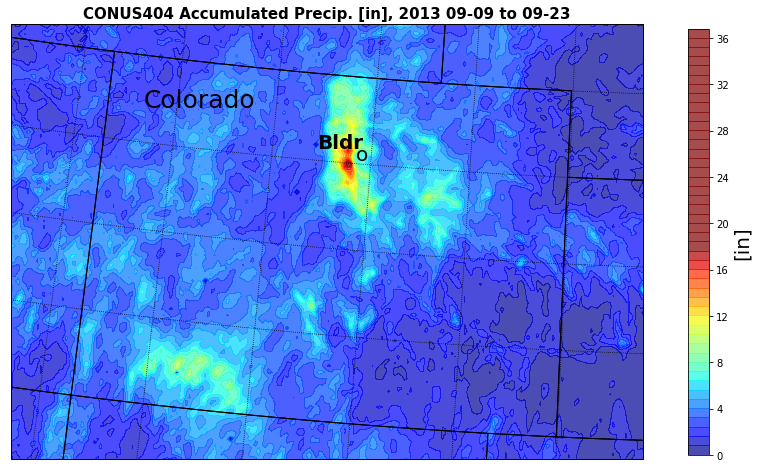

In [43]:
# Mapping Helper Routines
#   In this example, we’re going to extract the cartopy mapping object from a diagnostic variable (XLAT or XLONG), the lat,lon coordinates, and the geographic boundaries. 
#   Get the cartopy mapping object
cart_proj                   = get_cartopy(XLAT)

# Create a figure
fig1                        = plt.figure(figsize=(16, 8))
# Set the GeoAxes to the projection used by WRF
ax1                         = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
states                      = cfeature.STATES.with_scale('50m')
#states                      = NaturalEarthFeature(category="cultural", scale="50m",
#                                                  facecolor="none",
#                                                  name="admin_1_states_provinces_shp")
ax1.add_feature(states, linewidth=1.0, edgecolor="black")
ax1.coastlines('50m', linewidth=0.8)
plt.contourf(to_np(XLONG), to_np(XLAT), to_np(ACRAINLSM)/25.4, 50, transform=crs.PlateCarree(), vmin0=0, vmax=18, cmap=get_cmap("jet"), alpha=0.7)
#plt.contourf(to_np(XLONG), to_np(XLAT), to_np(geogrid1.ACRAINLSM).squeeze(), 100, transform=crs.PlateCarree(), vmin=0, vmax=40, cmap=get_cmap("jet"), alpha=0.6)

# Add a color bar
plt.colorbar(ax=ax1, shrink=0.98, orientation="vertical").set_label(label='[in]', size=20, weight='normal')
# Set the map bounds
ax1.set_xlim([-1050000, -250000])
ax1.set_ylim([ -250000,  300000])
#ax1.set_xlim(cartopy_xlim(XLONG))
#ax1.set_ylim(cartopy_ylim(XLAT))
# Add the gridlines
ax1.gridlines(color="black", linestyle="dotted")
# Add title using input file name components
plt.title('CONUS404 Accumulated Precip. [in], 2013 09-09 to 09-23', fontsize=15, weight='bold')
plt.text(-105.2281,      40.0373,             'o', transform=crs.PlateCarree(), fontsize=20, weight='normal')
plt.text(-105.2281-0.60, 40.0373+0.10,     'Bldr', transform=crs.PlateCarree(), fontsize=20, weight='bold')
plt.text(-108.5000,      40.4000,      'Colorado', transform=crs.PlateCarree(), fontsize=25, weight='normal')
plt.show()

In [22]:
plot = ACRAINLSM.hvplot.quadmesh(
    x='XLONG',
    y='XLAT',
    z=['TT', 'RH'],
    groupby=['Time'],
    widget_location='bottom',
    rasterize=True,
    coastline=True,
    cmap='inferno',
)
plot

AttributeError: 'DataArray' object has no attribute 'hvplot'

### NOTE: It appears that the CONUS404 does a very reasonable job at producing very significant precipitation amounts similar to what was observed during the flooding period.  

***

## References